In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import squarify

## 1. Purchase Behavior and Repeat Purchases

### The dataset used is "Superstore Sales Dataset" from Kaggle https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
#### Load dataset and check for missing values, removes duplicates, displays dataset summary

In [80]:
# Load the dataset
df = pd.read_csv("train.csv")

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Display dataset summary
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe().T)

Missing values per column:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   ob

#### Counts one-time vs. repeat buyers based on unique orders per customer and visualizes the distribution with a pie chart.


Total Unique Customers: 793
Repeat Buyers: 780
One-Time Buyers: 13


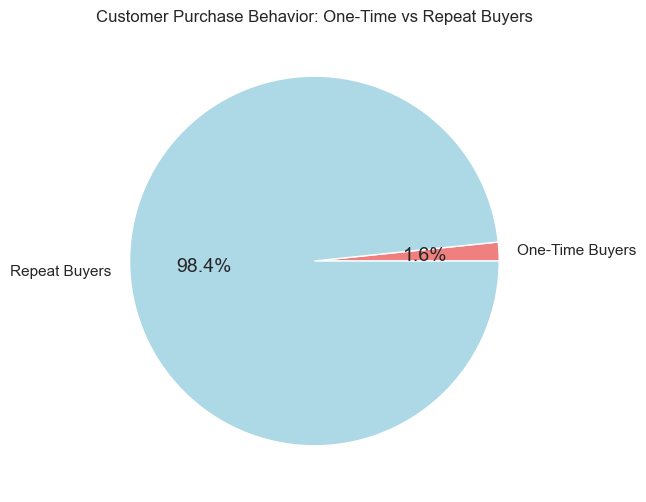

In [81]:
# Count number of purchases per customer
customer_purchases = df.groupby("Customer ID")["Order ID"].nunique()

# Classify customers
repeat_customers_count = (customer_purchases > 1).sum()
one_time_customers_count = (customer_purchases == 1).sum()

print(f"Total Unique Customers: {len(customer_purchases)}")
print(f"Repeat Buyers: {repeat_customers_count}")
print(f"One-Time Buyers: {one_time_customers_count}")

# Pie Chart Visualization
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    [one_time_customers_count, repeat_customers_count],
    labels=["One-Time Buyers", "Repeat Buyers"],
    autopct="%1.1f%%",
    colors=["lightcoral", "lightblue"],
)
ax.set_title("Customer Purchase Behavior: One-Time vs Repeat Buyers")
plt.show()

#### Filters repeat buyers, counts them per segment, and displays the results using a labeled treemap.

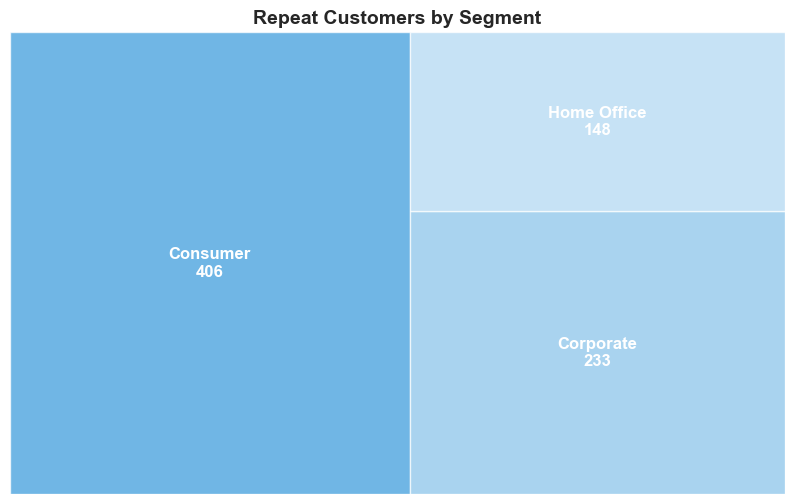

In [82]:
#Identify Repeat Buyers (Customers appearing more than once)
repeat_purchases = df[df.duplicated(subset=["Customer ID"], keep=False)]

# Count unique repeat customers per segment
segment_repeat = repeat_purchases.groupby("Segment")["Customer ID"].nunique().reset_index()
segment_repeat.columns = ["Segment", "Repeat Customers"]

# Treemap Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define Labels with Segments & Repeat Customer Count
labels = [f"{seg}\n{count}" for seg, count in zip(segment_repeat["Segment"], segment_repeat["Repeat Customers"])]
colors = ["#3498DB", "#85C1E9", "#AED6F1"] 

# Plot Treemap
squarify.plot(
    sizes=segment_repeat["Repeat Customers"],
    label=labels,
    color=colors,
    alpha=0.7,
    text_kwargs={'fontsize': 12, 'color': 'white', 'weight': 'bold'}
)

# Title and Formatting
plt.title("Repeat Customers by Segment", fontsize=14, fontweight="bold")
plt.axis("off") 

plt.show()

### The dataset used is "E-Commerce Dataset" from Kaggle https://www.kaggle.com/datasets/steve1215rogg/e-commerce-dataset
#### Load dataset and check for missing values, removes duplicates, displays dataset summary

In [83]:
df = pd.read_csv("ecommerce_dataset_updated.csv")

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Display dataset summary
print("\nDataset Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe(include='all').T)

Missing values in each column:
User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB
None

Descriptive Statistics:
                   count unique             top freq        mean         std  \
User_ID        

#### Formats discount and price columns, categorizes discounts into levels, analyzes sales and revenue by each category, and visualizes their impact using bar charts.

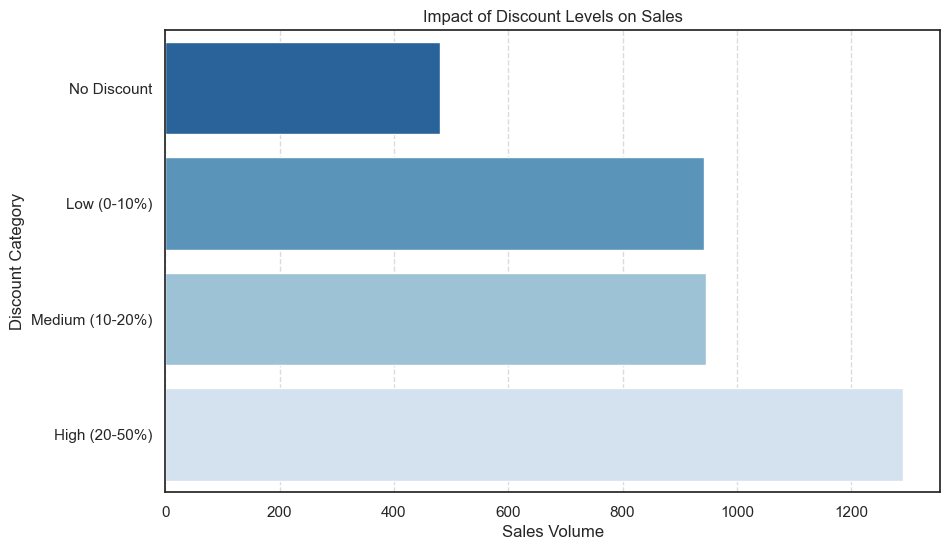

In [84]:
# Ensure numeric columns are correctly formatted
df['Discount (%)'] = pd.to_numeric(df['Discount (%)'], errors='coerce')
df['Final_Price(Rs.)'] = pd.to_numeric(df['Final_Price(Rs.)'], errors='coerce')

# Categorize discount levels
df['Discount_Category'] = pd.cut(
    df['Discount (%)'],
    bins=[-1, 0, 10, 20, 50, 100],
    labels=['No Discount', 'Low (0-10%)', 'Medium (10-20%)', 'High (20-50%)', 'Very High (50%+)']
)

# Filter out rows where Discount_Category is NaN
df_filtered = df[df['Discount_Category'].notna()]

# Remove unused categories from the Categorical column
df_filtered['Discount_Category'] = df_filtered['Discount_Category'].cat.remove_unused_categories()

# Sales volume by discount category 
sales_by_discount = df_filtered.groupby('Discount_Category')['Product_ID'].count().reset_index()
sales_by_discount.rename(columns={'Product_ID': 'Sales Volume'}, inplace=True)

# Revenue by discount category 
revenue_by_discount = df_filtered.groupby('Discount_Category')['Final_Price(Rs.)'].sum().reset_index()
revenue_by_discount.rename(columns={'Final_Price(Rs.)': 'Total Revenue'}, inplace=True)

# Merge sales and revenue
discount_analysis = pd.merge(sales_by_discount, revenue_by_discount, on="Discount_Category")

# Visualization: Sales Volume vs. Discount Levels (Horizontal)
plt.figure(figsize=(10, 6))
sns.barplot(y='Discount_Category', x='Sales Volume', data=discount_analysis, palette='Blues_r')
plt.xlabel("Sales Volume")
plt.ylabel("Discount Category")
plt.title("Impact of Discount Levels on Sales")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


#### Calculates days between repeat purchases per customer, categorizes them into time intervals, and visualizes their distribution using a pie chart

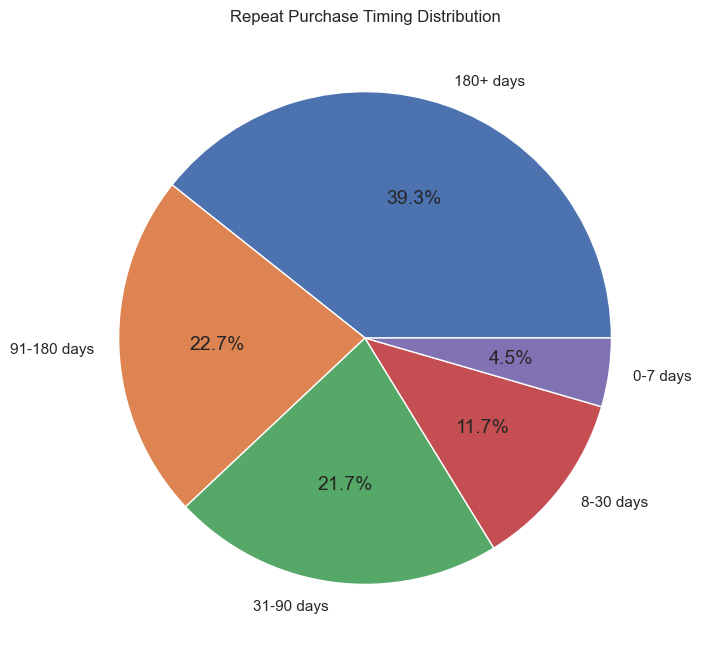

In [85]:
file_path = "train.csv"  
df = pd.read_csv(file_path)

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d/%m/%Y")

# Sort data by Customer ID and Order Date
df = df.sort_values(by=['Customer ID', 'Order Date'])

# Calculate the difference in days between consecutive orders for each customer
df['Days Since Last Purchase'] = df.groupby('Customer ID')['Order Date'].diff().dt.days

# Define categories based on purchase intervals
bins = [0, 7, 30, 90, 180, float('inf')]
labels = ['0-7 days', '8-30 days', '31-90 days', '91-180 days', '180+ days']

df['Purchase Interval Category'] = pd.cut(df['Days Since Last Purchase'], bins=bins, labels=labels, right=True)

# Count occurrences in each category
category_counts = df['Purchase Interval Category'].value_counts(normalize=True) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white'})
plt.title("Repeat Purchase Timing Distribution")

plt.show()

## 2. Seasonality and Shopping Trends

#### Extracts sales quarters, sums sales per quarter, and visualizes total revenue by quarter using a color-coded bar chart

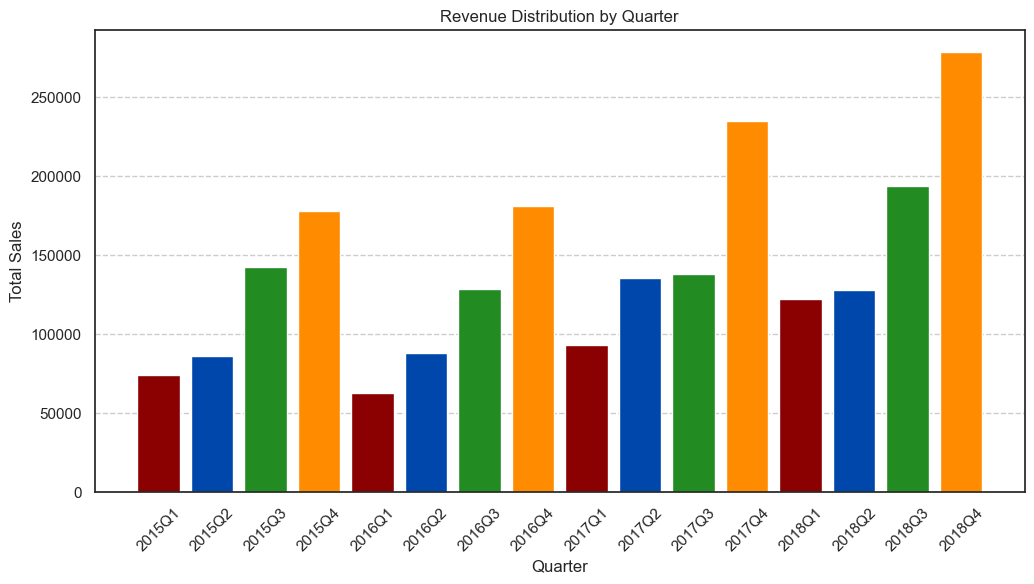

In [86]:
# Convert 'Order Date' to datetime
df_sales["Order Date"] = pd.to_datetime(df_sales["Order Date"], dayfirst=True)

# Create 'Quarter' column in the format "YYYYQX"
df_sales["Quarter"] = df_sales["Order Date"].dt.year.astype(str) + "Q" + df_sales["Order Date"].dt.quarter.astype(str)

df_sales["Quarter"] = df_sales["Quarter"].astype(str)

# Aggregating numerical data by groups
quarterly_sales = df_sales.groupby("Quarter")["Sales"].sum().reset_index()

# Define custom colors for each quarter
colors = ["#8B0000", "#0047AB", "#228B22", "#FF8C00"] * (len(quarterly_sales) // 4 + 1)  # Repeat to match length

# Plot with different colors for each quarter
plt.figure(figsize=(12, 6))
plt.bar(quarterly_sales["Quarter"], quarterly_sales["Sales"], color=colors[:len(quarterly_sales)])
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.title("Revenue Distribution by Quarter")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")

#### Extracts month and year, aggregates monthly sales by year, and visualizes seasonal sales trends across years using a line plot

C:\Users\abdul\AppData\Local\Temp\ipykernel_32008\3357512771.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_sales["Order Date"] = pd.to_datetime(df_sales["Order Date"], infer_datetime_format=True, dayfirst=True)


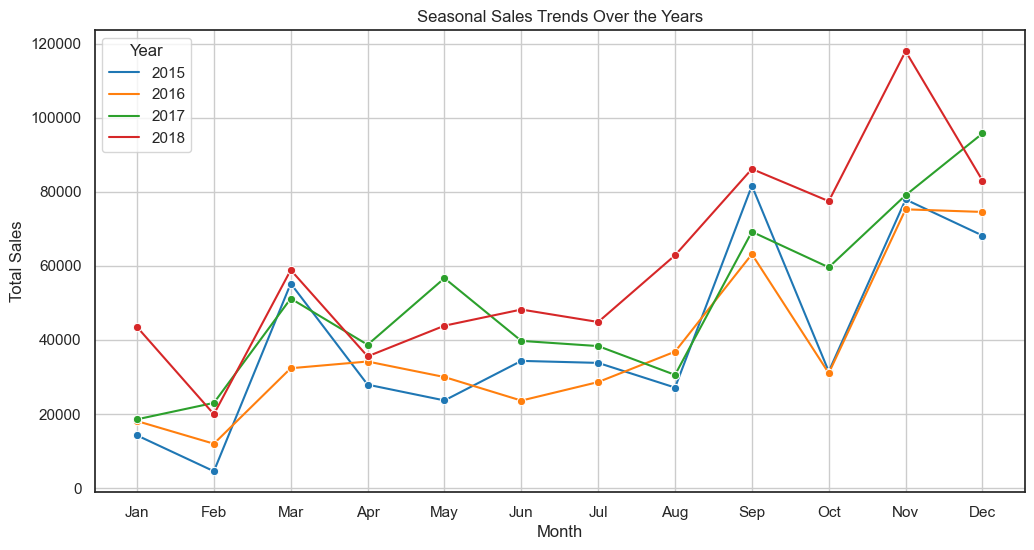

In [87]:
df_sales["Order Date"] = pd.to_datetime(df_sales["Order Date"], infer_datetime_format=True, dayfirst=True)
df_sales["Month"] = df_sales["Order Date"].dt.month
df_sales["Year"] = df_sales["Order Date"].dt.year

# Aggregate monthly sales over the years
# Aggregating numerical data by groups
monthly_sales = df_sales.groupby(["Year", "Month"])["Sales"].sum().reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="Month", y="Sales", hue="Year", marker="o", palette="tab10")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Seasonal Sales Trends Over the Years")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")
plt.grid(True)

plt.show()

#### Aggregates monthly sales by product category and visualizes seasonal sales trends across categories using a stacked area chart

<Figure size 1200x600 with 0 Axes>

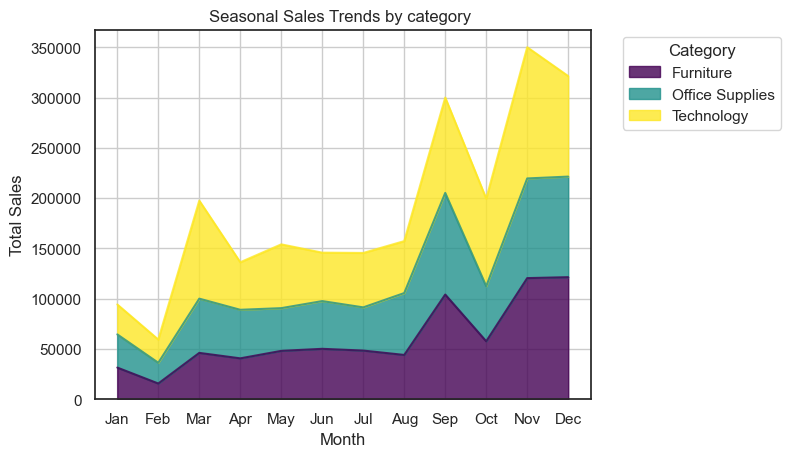

In [88]:
category_seasonality_area = df_sales.groupby(["Month", "Category"])["Sales"].sum().unstack()

# Visualization
plt.figure(figsize=(12, 6))
category_seasonality_area.plot(kind="area", stacked=True, colormap="viridis", alpha=0.8)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Seasonal Sales Trends by category ")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

#### Calculates shipping time in days, averages it by month and region, and visualizes the result using a heatmap

C:\Users\abdul\AppData\Local\Temp\ipykernel_32008\3711678800.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_sales["Order Date"] = pd.to_datetime(df_sales["Order Date"], dayfirst=True, infer_datetime_format=True)
C:\Users\abdul\AppData\Local\Temp\ipykernel_32008\3711678800.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_sales["Ship Date"] = pd.to_datetime(df_sales["Ship Date"], dayfirst=True, infer_datetime_format=True)


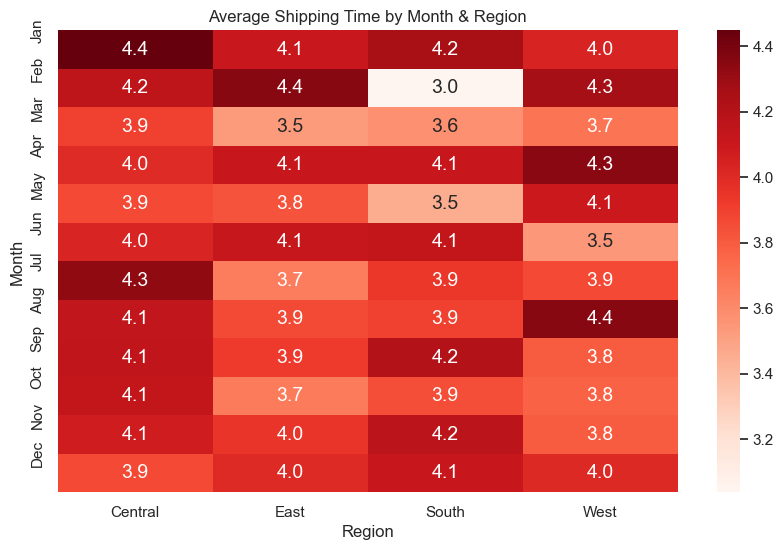

In [89]:
df_sales["Order Date"] = pd.to_datetime(df_sales["Order Date"], dayfirst=True, infer_datetime_format=True)
df_sales["Ship Date"] = pd.to_datetime(df_sales["Ship Date"], dayfirst=True, infer_datetime_format=True)

# Calculate Shipping Time
df_sales["Shipping Time"] = (df_sales["Ship Date"] - df_sales["Order Date"]).dt.days

# Extract Month and Region
df_sales["Month"] = df_sales["Order Date"].dt.month

# Aggregate Shipping Time by Month and Region
shipping_time_region = df_sales.groupby(["Month", "Region"])["Shipping Time"].mean().unstack()


# Visualization
plt.figure(figsize=(10, 6))

sns.heatmap(shipping_time_region, cmap="Reds", annot=True, fmt=".1f")
plt.xlabel("Region")
plt.ylabel("Month")
plt.title("Average Shipping Time by Month & Region")
plt.yticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.show()

## 3. Online Marketing Campaign Impact

### The dataset used is "Marketing Campaign Performance Dataset" from Kaggle https://www.kaggle.com/datasets/manishabhatt22/marketing-campaign-performance-dataset
#### Loads the marketing campaign dataset, checks for missing values, removes duplicates, displays dataset summary, and lists all unique companies present

In [90]:
file_path = "marketing_campaign_dataset.csv"  # Ensure this file is in your current working directory
df = pd.read_csv(file_path)
df.head()

# Checking for missing values in each column
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Dropping unnecessary columns or rows
df.drop_duplicates(inplace=True)

# Display dataset dimensions
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

df.info()
df.describe().T

# Get unique company names
unique_companies = df['Company'].unique()
# Display the list of companies
print("Distinct companies in the dataset:")
for company in unique_companies:
    print("-", company)

Series([], dtype: int64)
Dataset contains 200000 rows and 16 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15

#### Groups data by campaign duration to compute average conversion rates and visualizes the trend using a line plot

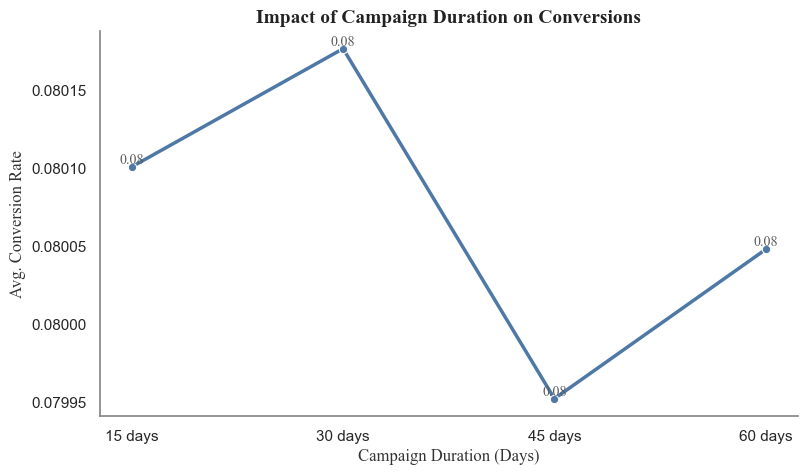

In [91]:
# Group by Campaign Duration and calculate Conversion Rate
campaign_duration = df.groupby("Duration")["Conversion_Rate"].mean().reset_index()

# Visualization
plt.figure(figsize=(9, 5))
plt.rcParams["font.family"] = "Times New Roman"  # Set font to Times New Roman

sns.set_theme(style="white")

ax = sns.lineplot(x="Duration", y="Conversion_Rate", data=campaign_duration, marker="o", color="#4E79A7", linewidth=2.5)

# Add data labels next to each point
for i, row in campaign_duration.iterrows():
    plt.text(row["Duration"], row["Conversion_Rate"], f"{row['Conversion_Rate']:.2f}", 
             fontsize=10, ha='center', va='bottom', fontfamily="Times New Roman", color="#555")

ax.grid(False)

ax.spines["top"].set_visible(False)  # Hide top border
ax.spines["right"].set_visible(False)  # Hide right border
ax.spines["left"].set_color("#888888")  # Subtle left border
ax.spines["bottom"].set_color("#888888")  # Subtle bottom border

# Labels & Title
plt.xlabel("Campaign Duration (Days)", fontfamily="Times New Roman", fontsize=12, color="#333")
plt.ylabel("Avg. Conversion Rate", fontfamily="Times New Roman", fontsize=12, color="#333")
plt.title("Impact of Campaign Duration on Conversions", fontfamily="Times New Roman", fontsize=14, color="#222", weight="bold")

plt.show()

#### Identifies top 2 and worst marketing channels by average conversion rate, and visualizes their monthly performance using a line plot

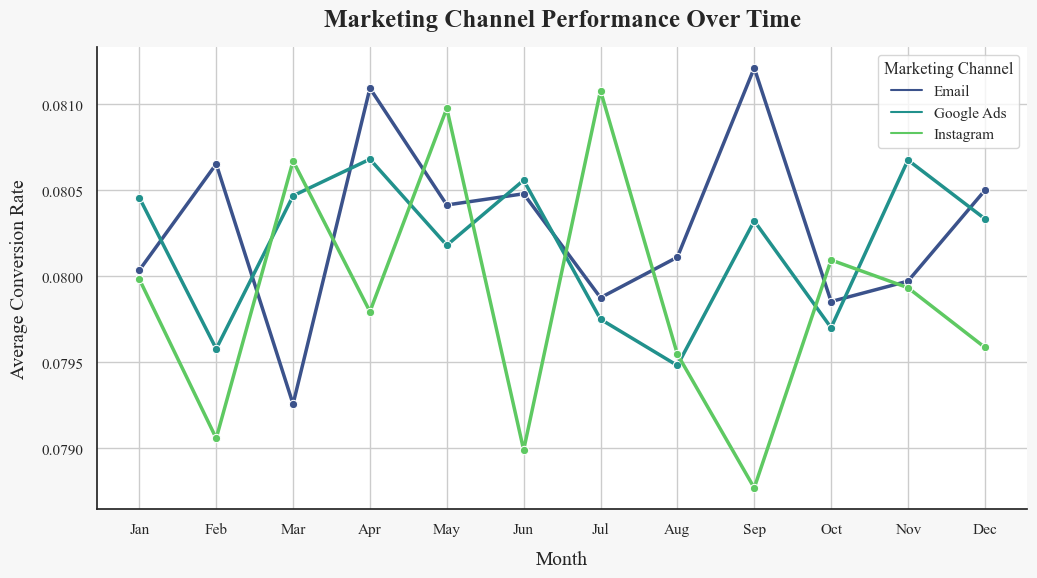

In [92]:
# Convert Date to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Extract Month
df["Month"] = df["Date"].dt.month

# Group by channel, then calculate average conversion rate
channel_performance_overall = df.groupby("Channel_Used")["Conversion_Rate"].mean().reset_index()

# Identify the top 2 best and the worst performing channels
top_2_channels = channel_performance_overall.nlargest(2, "Conversion_Rate")
worst_channel = channel_performance_overall.nsmallest(1, "Conversion_Rate")

selected_channels = pd.concat([top_2_channels, worst_channel])

# Filter data for the selected channels
filtered_data = df[df["Channel_Used"].isin(selected_channels["Channel_Used"])]

# Group by month and channel, then calculate average conversion rate
channel_performance_filtered = filtered_data.groupby(["Month", "Channel_Used"])["Conversion_Rate"].mean().reset_index()

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14 

# Visualization: Line plot for selected channel performance over time
plt.figure(figsize=(12, 6), facecolor="#F7F7F7")

sns.lineplot(
    data=channel_performance_filtered, 
    x="Month", 
    y="Conversion_Rate", 
    hue="Channel_Used", 
    marker="o", 
    palette="viridis",
    linewidth=2.5
)

plt.xlabel("Month", fontsize=14, labelpad=10)
plt.ylabel("Average Conversion Rate", fontsize=14, labelpad=10)
plt.title("Marketing Channel Performance Over Time", fontsize=18, fontweight="bold", pad=15)
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Marketing Channel")

plt.grid(True)

sns.despine()

plt.show()

#### Computes average clicks per bin per company, and visualizes the relationship between clicks and impressions using scatter and regression plots

C:\Users\abdul\AppData\Local\Temp\ipykernel_32008\3892940518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["impressions"] = pd.to_numeric(df_filtered["Impressions"], errors="coerce")
C:\Users\abdul\AppData\Local\Temp\ipykernel_32008\3892940518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["clicks"] = pd.to_numeric(df_filtered["Clicks"], errors="coerce")
C:\Users\abdul\AppData\Local\Temp\ipykernel_32008\3892940518.py:8: SettingWithCopyWarning: 
A value is trying to be set 

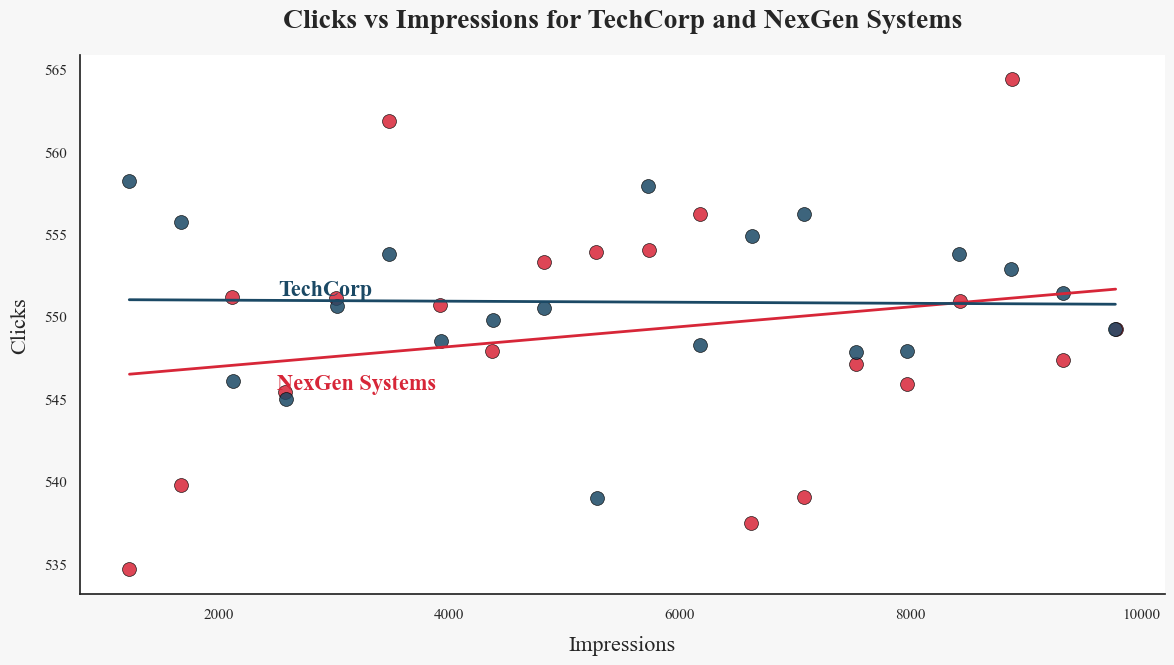

In [93]:
# Ensure 'Impressions' and 'Clicks' are numeric
df_filtered = df[df["Company"].isin(["TechCorp", "NexGen Systems"])]
df_filtered["impressions"] = pd.to_numeric(df_filtered["Impressions"], errors="coerce")
df_filtered["clicks"] = pd.to_numeric(df_filtered["Clicks"], errors="coerce")

# Define bins for impressions to cluster data
num_bins = 20
df_filtered["impressions_bin"] = pd.cut(df_filtered["impressions"], bins=num_bins, labels=False)

# Aggregate data for clustering
df_grouped = df_filtered.groupby(["Company", "impressions_bin"]).agg({
    "impressions": "mean",
    "clicks": "mean"
}).reset_index()

color_mapping = {
    "NexGen Systems": "#D72638",  # Rich Red
    "TechCorp": "#1B4965"  # Deep Blue
}

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14  # Increase text readability

# Visualizing data
fig, ax = plt.subplots(figsize=(14, 7), facecolor="#F7F7F7")  # Light background

for company, color in color_mapping.items():
    company_data = df_grouped[df_grouped["Company"] == company]
    
    sns.scatterplot(
        data=company_data, x="impressions", y="clicks", color=color, 
        s=100, alpha=0.85, edgecolor="black", linewidth=0.5
    )

    sns.regplot(
        data=company_data, x="impressions", y="clicks",
        scatter=False, color=color, ci=None, line_kws={"linewidth": 2}
    )

    left_x = company_data["impressions"].quantile(0.15)
    left_y = np.polyval(np.polyfit(company_data["impressions"], company_data["clicks"], 1), left_x)

    if company == "NexGen Systems":
        left_y -= 2

    plt.text(
        left_x, left_y, company, fontsize=16, color=color, weight='bold',
        verticalalignment='bottom', horizontalalignment='left'
    )

plt.title("Clicks vs Impressions for TechCorp and NexGen Systems", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Impressions", fontsize=16, labelpad=10)
plt.ylabel("Clicks", fontsize=16, labelpad=10)

# Remove grid lines
plt.grid(False)

# Remove legend
plt.legend().remove()

# Remove top and right spines for a clean, modern look
sns.despine()

plt.show()

#### Computes average conversion rate per clicks bin per company, and visualizes the relationship between clicks and conversion rate using scatter and regression plots

C:\Users\abdul\AppData\Local\Temp\ipykernel_32008\1657553841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["conversion_rate"] = pd.to_numeric(df_filtered["Conversion_Rate"], errors="coerce")
C:\Users\abdul\AppData\Local\Temp\ipykernel_32008\1657553841.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["clicks_bin"] = pd.cut(df_filtered["clicks"], bins=num_bins, labels=False)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore 

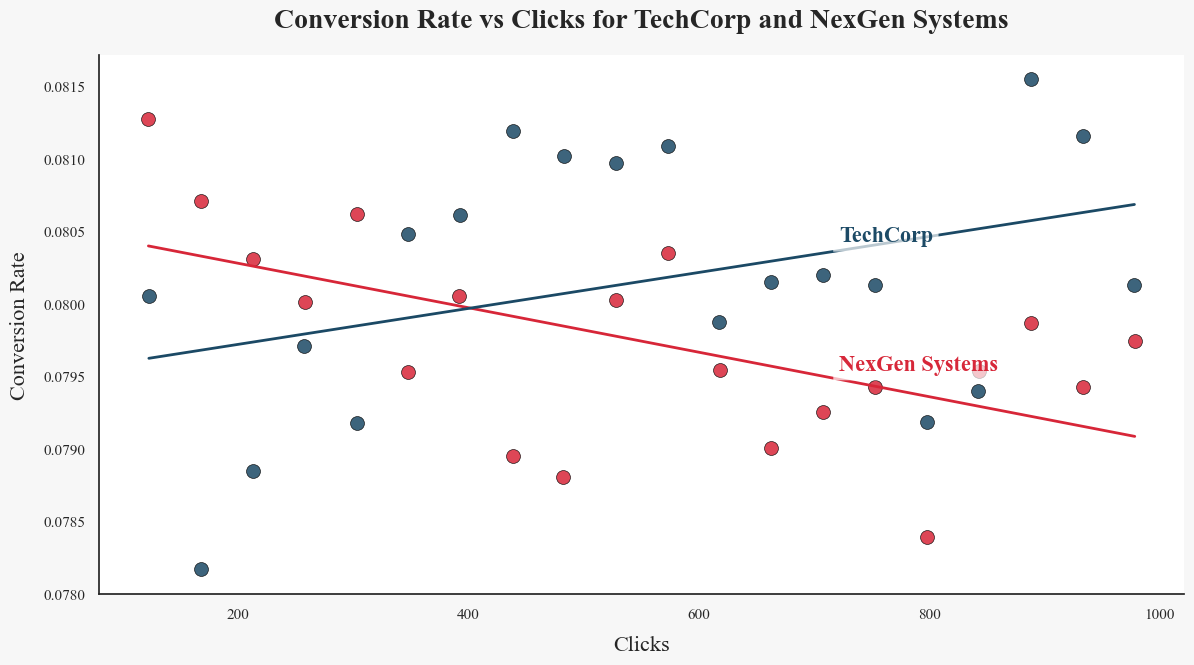

In [94]:
df_filtered["conversion_rate"] = pd.to_numeric(df_filtered["Conversion_Rate"], errors="coerce")

# Define bins for clicks to cluster data
num_bins = 20
df_filtered["clicks_bin"] = pd.cut(df_filtered["clicks"], bins=num_bins, labels=False)

# Aggregate data for clustering
df_grouped = df_filtered.groupby(["Company", "clicks_bin"]).agg({
    "clicks": "mean",
    "conversion_rate": "mean"
}).reset_index()

# Define color palette
color_mapping = {
    "NexGen Systems": "#D72638",  # Rich Red
    "TechCorp": "#1B4965"  # Deep Blue
}

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14  # Increase text readability

# Visualizing data
fig, ax = plt.subplots(figsize=(14, 7), facecolor="#F7F7F7")  # Light background

for company, color in color_mapping.items():
    company_data = df_grouped[df_grouped["Company"] == company]

    sns.scatterplot(
        data=company_data, x="clicks", y="conversion_rate", color=color, 
        s=100, alpha=0.85, edgecolor="black", linewidth=0.5
    )

    sns.regplot(
        data=company_data, x="clicks", y="conversion_rate",
        scatter=False, color=color, ci=None, line_kws={"linewidth": 2}
    )

    # Calculate slope of regression line
    slope, intercept = np.polyfit(company_data["clicks"], company_data["conversion_rate"], 1)
    angle = np.degrees(np.arctan(slope))  # Convert slope to angle in degrees

    text_x = company_data["clicks"].quantile(0.7)
    text_y = intercept + slope * text_x + 0.0001

    # Add text label
    plt.text(
        text_x, text_y, company, fontsize=16, color=color, fontweight="bold",
        rotation=angle, ha="left", va="center", 
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
    )

# Styling the plot
plt.title("Conversion Rate vs Clicks for TechCorp and NexGen Systems", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Clicks", fontsize=16, labelpad=10)
plt.ylabel("Conversion Rate", fontsize=16, labelpad=10)

# Remove grid lines
plt.grid(False)

# Remove legend
plt.legend().remove()

sns.despine()

plt.show()

#### Computes average monthly ROI per company and visualizes ROI trends over time using a line plot

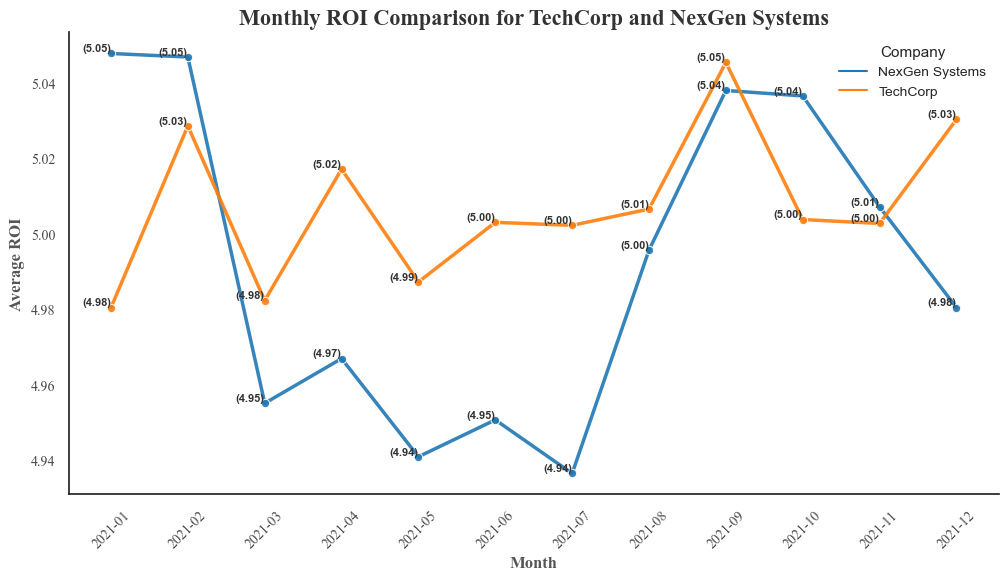

In [95]:
df['date'] = pd.to_datetime(df['Date'])

# Extract year and month
df['year_month'] = df['date'].dt.to_period('M')

# Aggregate data to get the average ROI per month per company
df_monthly_roi = df.groupby(['Company', 'year_month']).agg({'ROI': 'mean'}).reset_index()

# Convert period to string for plotting
df_monthly_roi['year_month'] = df_monthly_roi['year_month'].astype(str)

# Filter data to include only TechCorp and NexGen Systems
df_monthly_roi_filtered = df_monthly_roi[df_monthly_roi["Company"].isin(["TechCorp", "NexGen Systems"])]

# Set color palette
colors = ["#1f77b4", "#ff7f0e"]  # Blue and Orange (Tableau default)

# Create the figure
plt.figure(figsize=(12, 6), facecolor="white")  # White background
ax = plt.gca()

plt.rcParams["font.family"] = "Arial"

# Visualizing data
sns.lineplot(data=df_monthly_roi_filtered, x="year_month", y="ROI", hue="Company",marker="o", linewidth=2.5, palette=colors, alpha=0.9)

# Title and labels
plt.title("Monthly ROI Comparison for TechCorp and NexGen Systems", fontsize=16, fontweight="bold", color="#333333")
plt.xlabel("Month", fontsize=12, fontweight="bold", color="#555555")
plt.ylabel("Average ROI", fontsize=12, fontweight="bold", color="#555555")
plt.xticks(rotation=45, fontsize=10, color="#444444")
plt.yticks(fontsize=10, color="#444444")

# Remove the background grid lines
ax.grid(False)  # Remove background lines

sns.despine(top=True, right=True)  # Keep axis lines but remove unnecessary borders

# Customize legend
plt.legend(title="Company", fontsize=10, title_fontsize=11, frameon=False, loc="upper right")

for line in ax.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x, y, f"({y:.2f})", fontsize=8, color="#333333",verticalalignment="bottom", horizontalalignment="right", fontweight="bold")

plt.show()

## 4. Churn Analysis

#### Flags customers with low engagement scores as churned based on a threshold, then prints the count and average engagement score for churned vs. non-churned groups

In [96]:
engagement_threshold = 3  #Adjust this based on the distribution of Engagement_Score

# Mark customers with engagement score below the threshold as churned
df['Churn'] = df['Engagement_Score'] < engagement_threshold

# Check the distribution of churned vs non-churned customers
# Counting unique values in a column
print(df['Churn'].value_counts())

print(df.groupby('Churn')['Engagement_Score'].mean())

Churn
False    159860
True      40140
Name: count, dtype: int64
Churn
False    6.497492
True     1.501071
Name: Engagement_Score, dtype: float64


#### Aggregates churned vs. non-churned customer counts and visualizes their proportions using a pie chart.

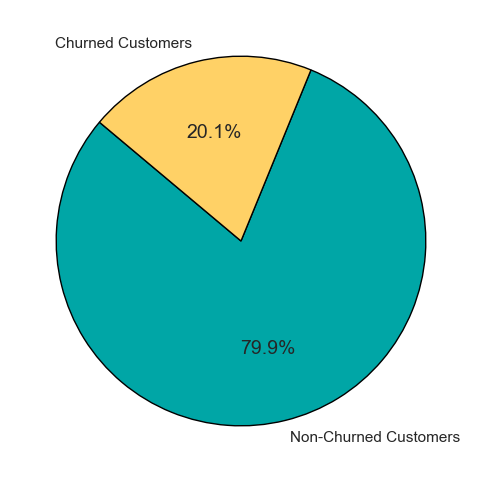

In [97]:
# Aggregate data: Sum counts for churned vs non-churned customers
churn_counts = df.groupby('Churn').size()

# Define labels and colors
labels = ['Non-Churned Customers', 'Churned Customers']
colors = ['#00A6A6', '#FFD166']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

plt.show()

#### Calculates conversion rate as a percentage of impressions and visualizes its distribution using a histogram.

In [98]:
# Calculate the Conversion Rate
df['Conversion_Rate'] = (df['Conversion_Rate'] / df['Impressions']) * 100

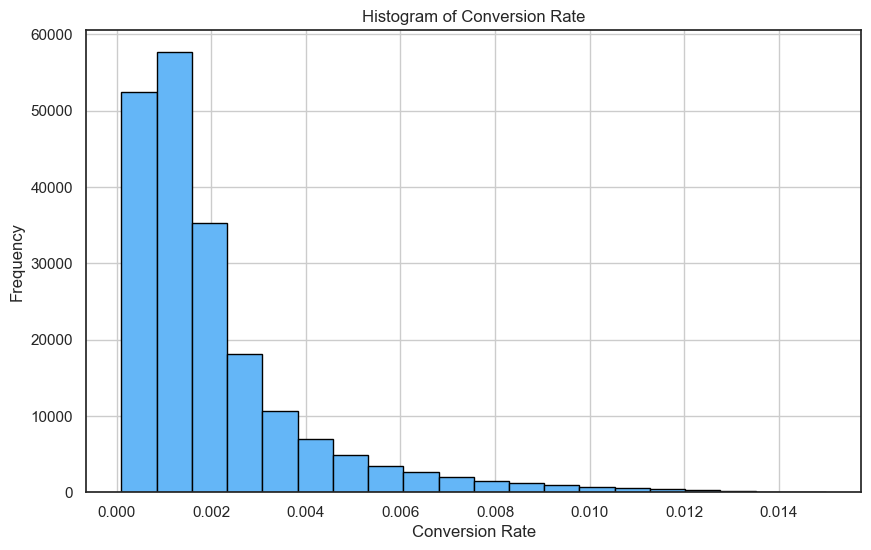

In [99]:
# Histogram for Conversion Rate
plt.figure(figsize=(10, 6))
plt.hist(df['Conversion_Rate'], bins=20, color='#64B6F7', edgecolor='black')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Conversion Rate')
plt.grid(True)
plt.show()

#### Estimates revenue and loss from churned customers, calculates revenue loss percentage, and visualizes total vs. lost revenue with a bar chart

In [100]:
required_columns = ['Clicks', 'Conversion_Rate', 'ROI', 'Engagement_Score']
missing_cols = [col for col in required_columns if col not in df.columns]

if missing_cols:
    raise KeyError(f"Missing columns in dataset: {missing_cols}")

# Convert columns to numeric to avoid errors, coerce invalid values to NaN
df[['Clicks', 'Conversion_Rate', 'ROI']] = df[['Clicks', 'Conversion_Rate', 'ROI']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in critical columns if necessary (you can adjust the logic here)
# Dropping unnecessary columns or rows
df = df.dropna(subset=['Clicks', 'Conversion_Rate', 'ROI'])

# Estimate revenue
df['Estimated_Revenue'] = (df['Clicks'] * (df['Conversion_Rate'] / 100)) * df['ROI']

# Total revenue before churn
total_revenue = df['Estimated_Revenue'].sum()

# Revenue from churned customers (Engagement Score < 3)
churned_revenue = df[df['Engagement_Score'] < 3]['Estimated_Revenue'].sum()

# Revenue lost due to churn
revenue_lost = churned_revenue

# Avoid division by zero
churn_percentage = (revenue_lost / total_revenue) * 100 if total_revenue > 0 else 0

# Print results
print(f"Total Estimated Revenue Before Churn: ${total_revenue:,.2f}")
print(f"Estimated Revenue Lost Due to Churn: ${revenue_lost:,.2f}")
print(f"Percentage of Revenue Lost: {churn_percentage:.2f}%")


Total Estimated Revenue Before Churn: $11,239.67
Estimated Revenue Lost Due to Churn: $2,277.30
Percentage of Revenue Lost: 20.26%


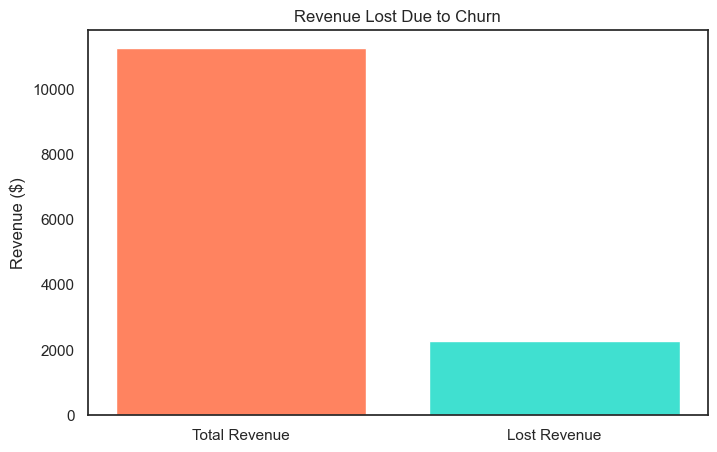

In [101]:
# Bar chart for total revenue vs lost revenue
plt.figure(figsize=(8, 5))
plt.bar(['Total Revenue', 'Lost Revenue'], [total_revenue, revenue_lost], color=['#FF8360', '#40E0D0'])
plt.ylabel("Revenue ($)")
plt.title("Revenue Lost Due to Churn")
plt.show()

#### Calculates average ROI for each cost range, and visualizes the relationship between acquisition cost and ROI using a bar chart

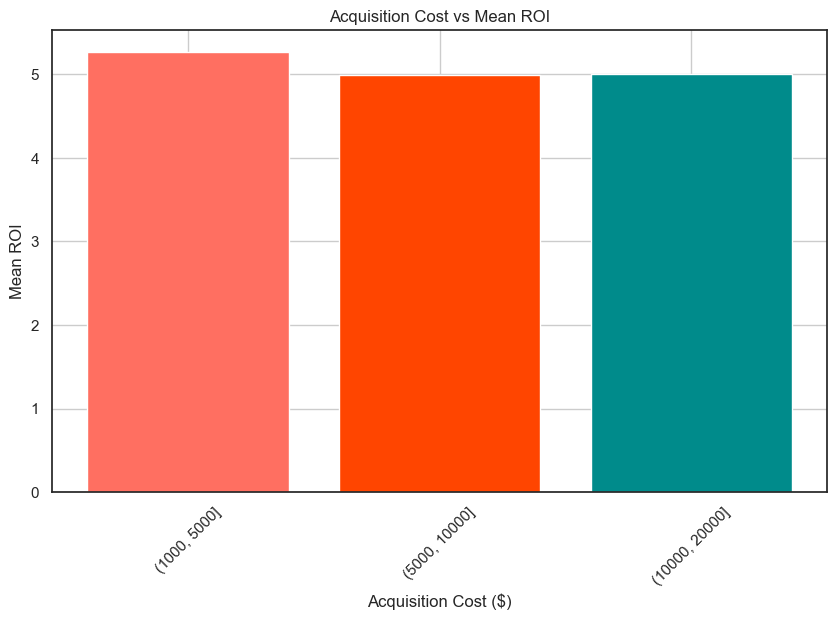

In [102]:
# Remove dollar signs and commas, then convert to numeric
df['Acquisition_Cost'] = df['Acquisition_Cost'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Define bins for Acquisition Cost
bins = [0, 1000, 5000, 10000, 20000]

# Create a new column 'Acquisition_Cost_Bin' based on the defined bins
df['Acquisition_Cost_Bin'] = pd.cut(df['Acquisition_Cost'], bins)

# Calculate the mean ROI for each bin
df = df.groupby('Acquisition_Cost_Bin')['ROI'].mean().reset_index()

# Bar plot for Acquisition Cost vs mean ROI
plt.figure(figsize=(10, 6))
plt.bar(df['Acquisition_Cost_Bin'].astype(str), df['ROI'], color=['#D1B3FF', '#FF6F61', '#FF4500', '#008B8B'])
plt.xlabel('Acquisition Cost ($)')
plt.ylabel('Mean ROI')
plt.title('Acquisition Cost vs Mean ROI')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()